###Collect Data for plot

In [4]:
import json

#with open('../skyrim_data/tag_category_skyrim.json','r') as f:
#    cat_dict = json.load(f)

with open('tagsToMods.json','r') as f:
    tag_dict = json.load(f)

with open('output.json','r') as f:
    mod_dict = json.load(f)

In [61]:
#Removed double counting, i.e. if a mod is present in a category its downloads are counted once
#name, id, num ratings, rating, size, date_posted, date_updated, unique subs, current subs, current favs 
TagStats = {}
for n in tag_dict.keys():
    if n not in TagStats.keys():
        TagStats[n]=[0,0,0]
        #print(n + "added to tag dictionary")
    for p in tag_dict[n]:
        #print(p)
        if p in mod_dict.keys():
            TagStats[n][0] += 1
            TagStats[n][1] += int(mod_dict[p][7].replace(",",""))
            TagStats[n][2] += int(mod_dict[p][8].replace(",",""))
            #print(mod_dict[p])


In [18]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import pylab
%matplotlib inline
fontP = FontProperties()
fontP.set_size('xx-large')

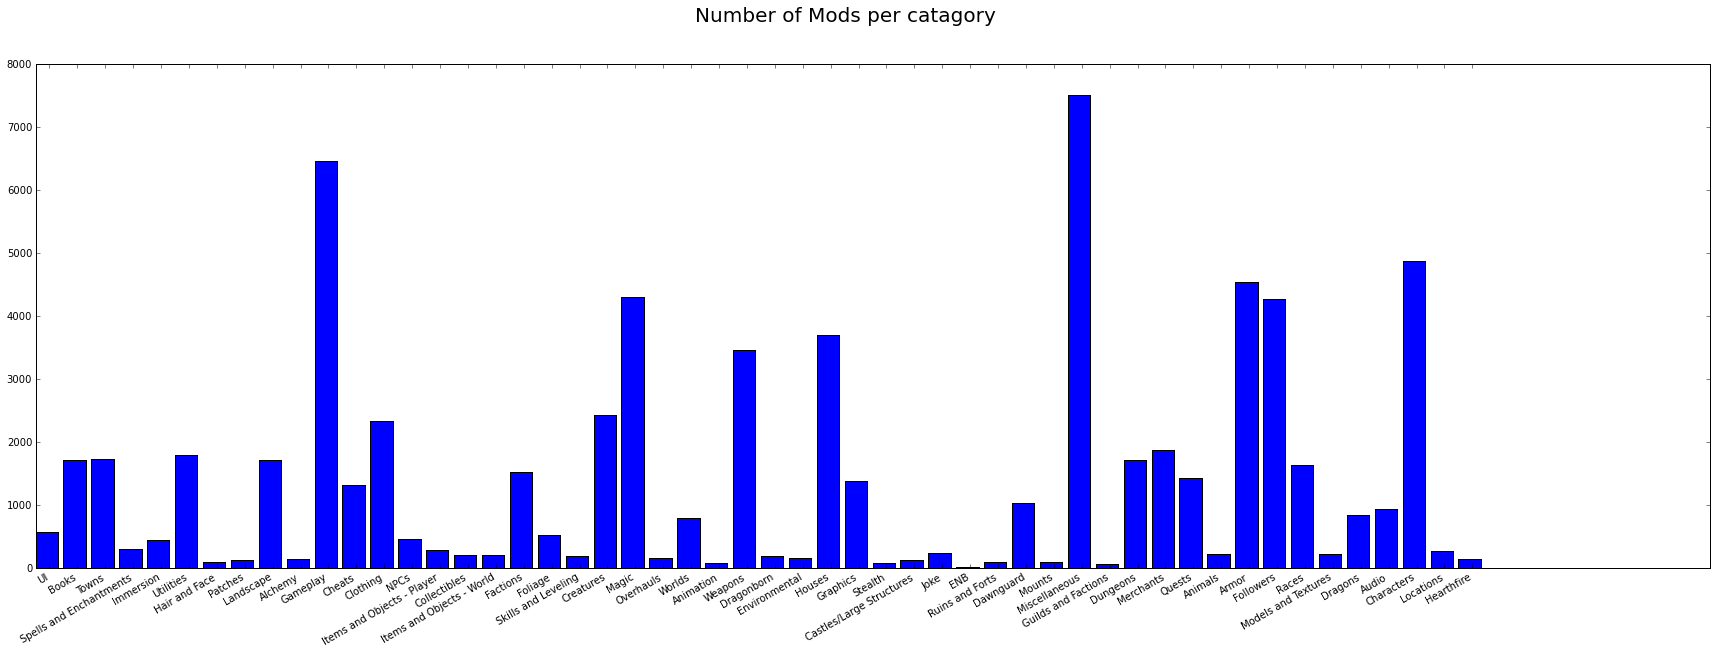

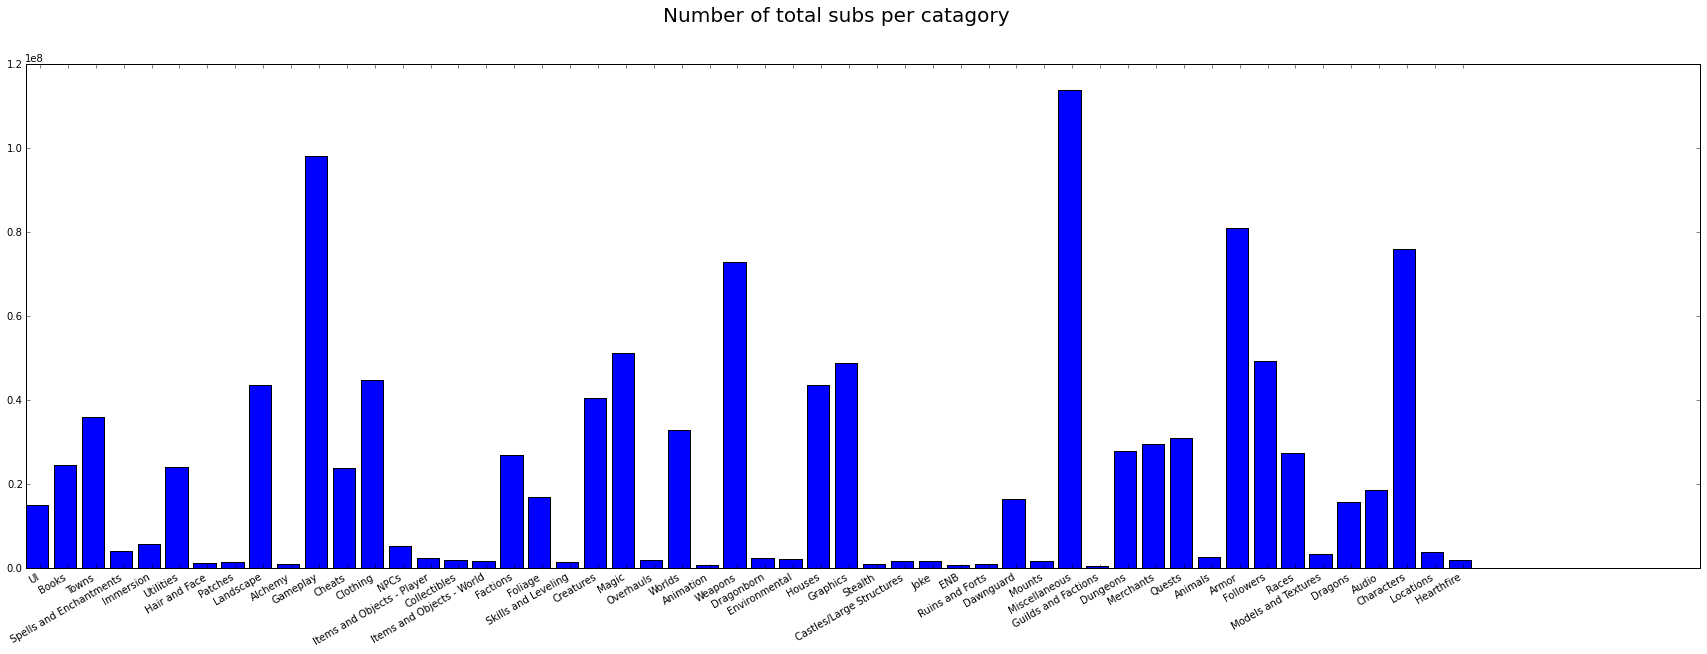

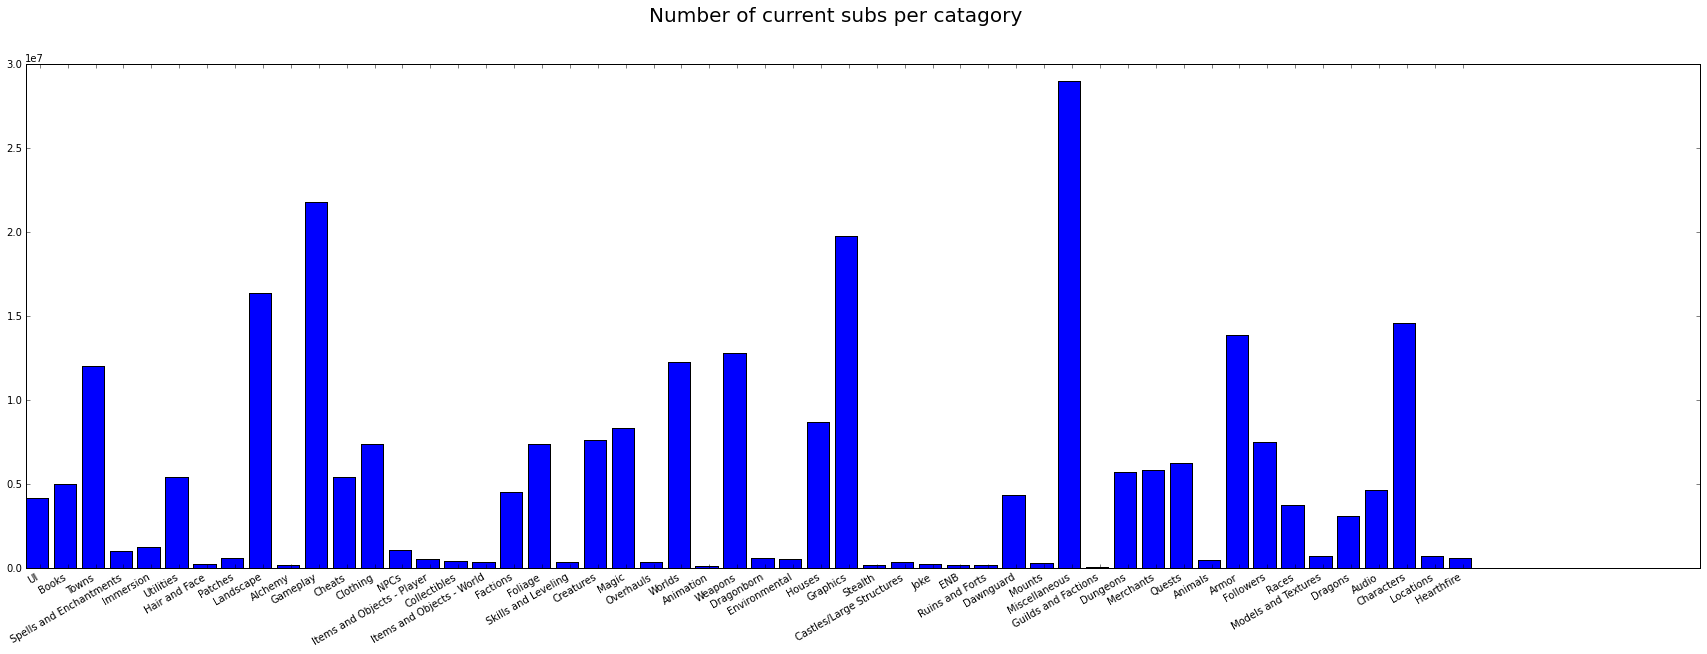

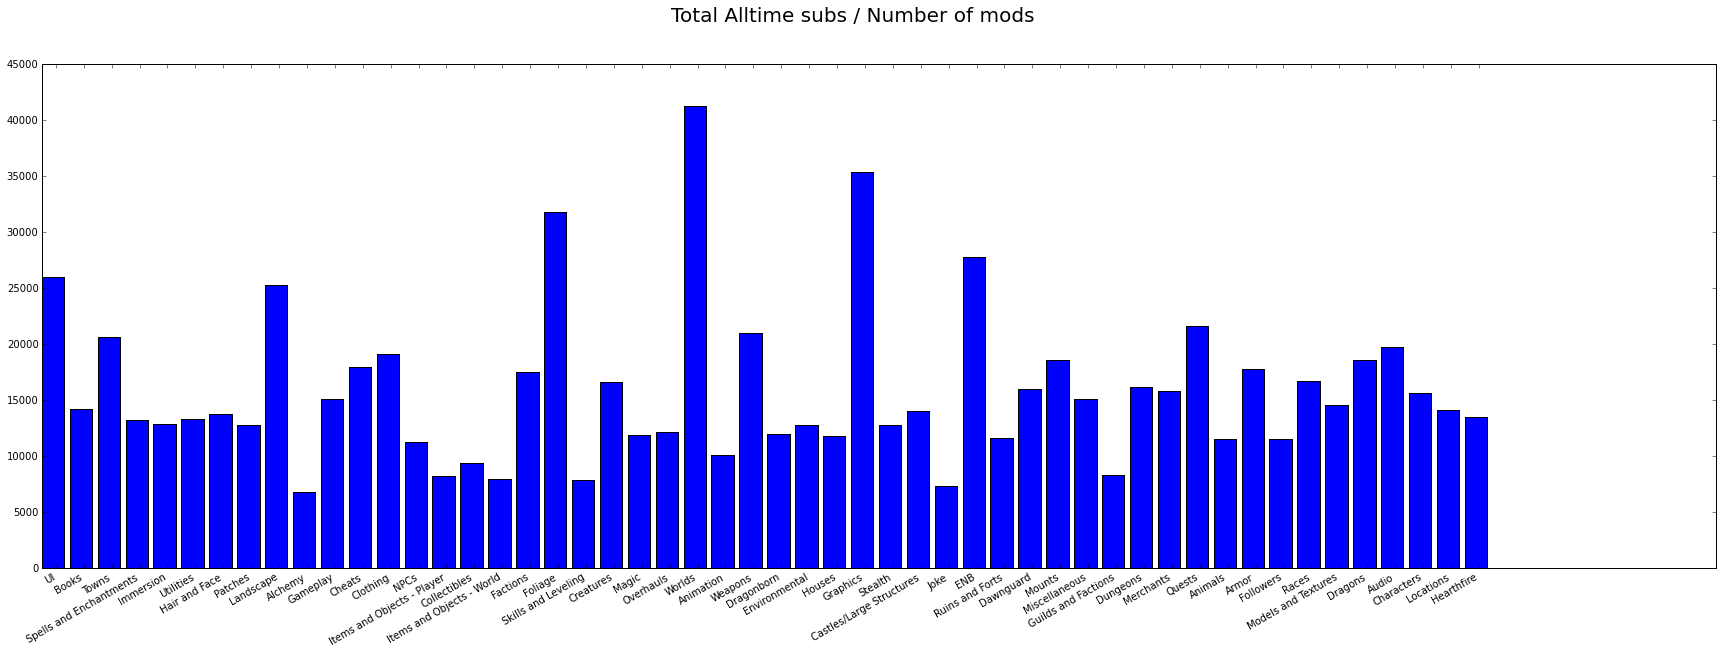

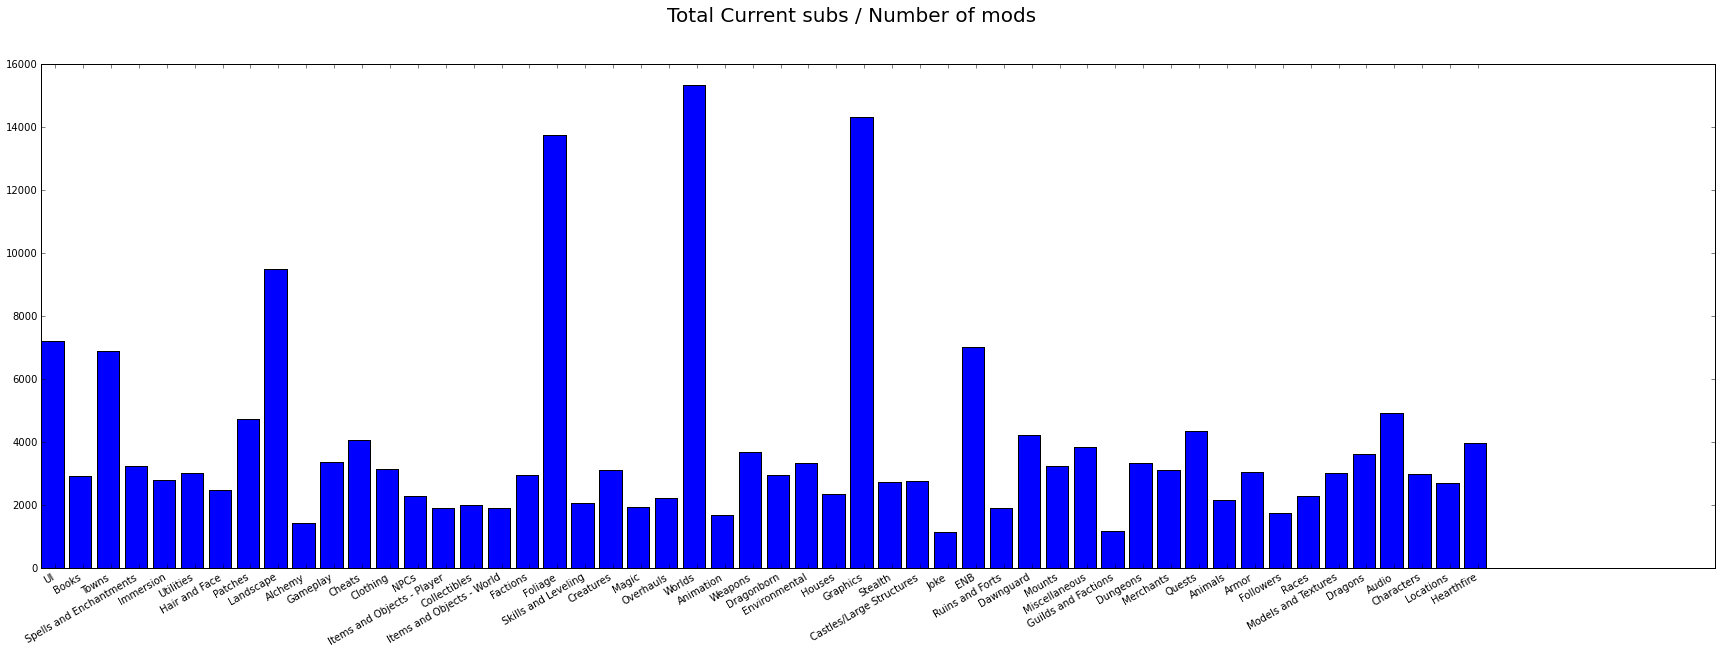

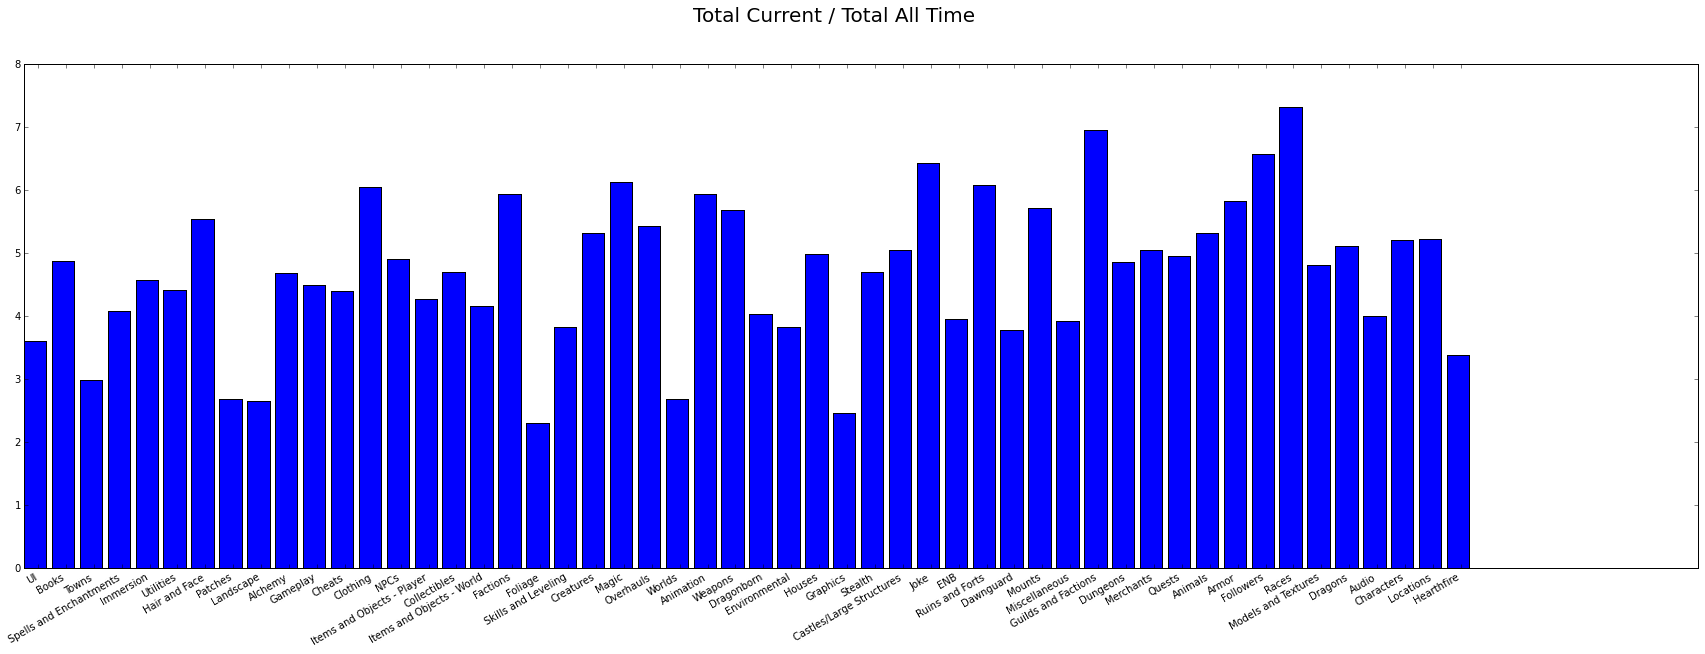

In [82]:
y1=[]
y2=[]
y3=[]
y4=[]
y5=[]
y6=[]
width = 1
if "incompabitle" in TagStats.keys():
    del TagStats["incompatible"]

x = list(TagStats.keys())
for p in x:
    y1.append(TagStats[p][0])
    y2.append(TagStats[p][1])
    y3.append(TagStats[p][2])
    y4.append(TagStats[p][1]/(TagStats[p][0]+1))
    y5.append(TagStats[p][2]/(TagStats[p][0]+1))
    y6.append(TagStats[p][1]/(TagStats[p][2]+1))

fig = plt.figure(figsize=(30,10))
ind = np.arange(len(y1))
plt.bar(ind,y1)
plt.xticks(ind + width / 2, x)
fig.autofmt_xdate()
fig.suptitle("Number of Mods per catagory",fontsize=20)

fig = plt.figure(figsize=(30,10))
ind = np.arange(len(y2))
plt.bar(ind,y2)
plt.xticks(ind + width / 2, x)
fig.autofmt_xdate()
fig.suptitle("Number of total subs per catagory",fontsize=20)

fig = plt.figure(figsize=(30,10))
ind = np.arange(len(y3))
plt.bar(ind,y3)
plt.xticks(ind + width / 2, x)
fig.autofmt_xdate()
fig.suptitle("Number of current subs per catagory",fontsize=20)

fig = plt.figure(figsize=(30,10))
ind = np.arange(len(y4))
plt.bar(ind,y4)
plt.xticks(ind + width / 2, x)
fig.autofmt_xdate()
fig.suptitle("Total Alltime subs / Number of mods",fontsize=20)

fig = plt.figure(figsize=(30,10))
ind = np.arange(len(y5))
plt.bar(ind,y5)
plt.xticks(ind + width / 2, x)
fig.autofmt_xdate()
fig.suptitle("Total Current subs / Number of mods",fontsize=20)

fig = plt.figure(figsize=(30,10))
ind = np.arange(len(y6))
plt.bar(ind,y6)
plt.xticks(ind + width / 2, x)
fig.autofmt_xdate()
fig.suptitle("Total Current / Total All Time",fontsize=20)